In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV , learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay ,roc_auc_score, roc_curve, precision_score , accuracy_score , f1_score , recall_score , classification_report
from sklearn import tree 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv(r"C:\Users\Chinna Joka\Downloads\Decision Tree Project\Decision Tree Project\Dataset\HeartDisease.csv")

In [3]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.shape

(303, 14)

In [7]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [8]:
numerical_features = df.select_dtypes(include=['int64' , 'float64']).columns
df[numerical_features].describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

In [10]:
X = df.drop('target' , axis = 1)
Y = df['target']

In [11]:
print(X.shape)
print(Y.value_counts())

(303, 13)
target
1    165
0    138
Name: count, dtype: int64


In [12]:
X_train ,X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.2 , random_state=42 , stratify=Y)

In [13]:
dec_tree = DecisionTreeClassifier(random_state=42 , criterion='log_loss')
dec_tree.fit(X_train , Y_train)

,criterion,'log_loss'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
Y_Pred = dec_tree.predict(X_test)
Y_Pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [15]:
print(f"Accuracy : {accuracy_score(Y_test , Y_Pred)}")

Accuracy : 0.7540983606557377


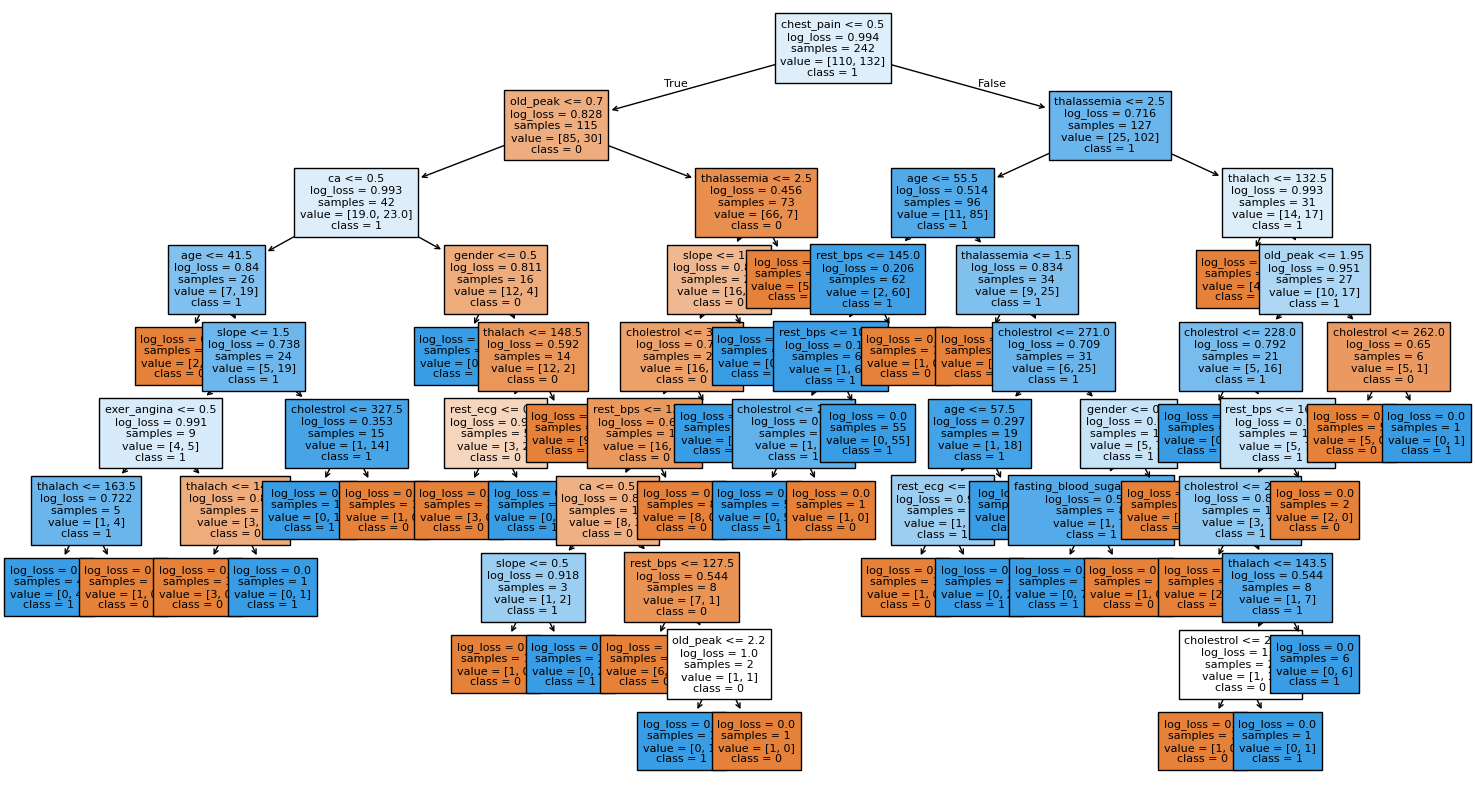

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))

tree.plot_tree(
    dec_tree,
    feature_names=X.columns,          # use column names, not full X
    class_names=[str(cls) for cls in set(Y)],  # unique class labels as strings
    filled=True,
    fontsize=8
)
plt.tight_layout()
plt.show()


In [17]:
cm = confusion_matrix(Y_test , Y_Pred)
cm

array([[20,  8],
       [ 7, 26]])

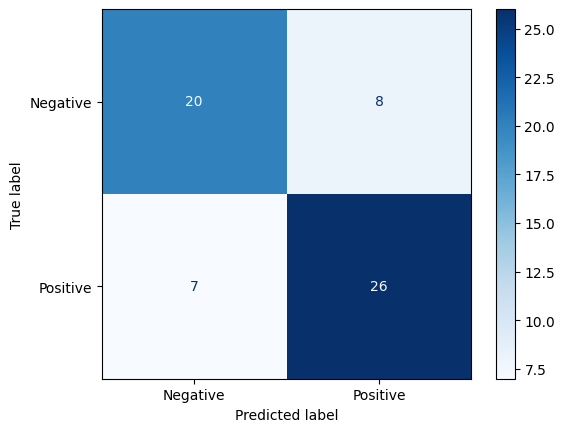

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.show()

In [19]:
# Evaluation Metrics
print("Accuracy :", accuracy_score(Y_test, Y_Pred))
print("Precision:", precision_score(Y_test, Y_Pred))
print("Recall   :", recall_score(Y_test, Y_Pred))
print("F1 Score :", f1_score(Y_test, Y_Pred))

Accuracy : 0.7540983606557377
Precision: 0.7647058823529411
Recall   : 0.7878787878787878
F1 Score : 0.7761194029850746


In [20]:
Classification_Report = classification_report(Y_test , Y_Pred)
print(Classification_Report)

              precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [21]:
y_prob = dec_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

In [22]:
roc_auc = roc_auc_score(Y_test, y_prob)
print("AUC Score:", roc_auc)

AUC Score: 0.751082251082251


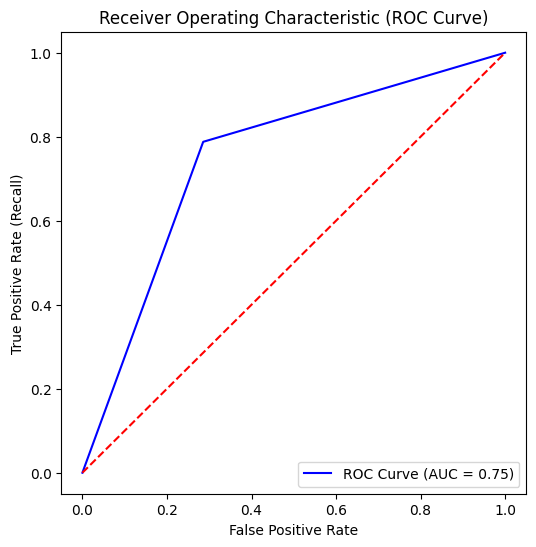

In [23]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="red", linestyle="--")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.legend(loc="lower right")
plt.show()


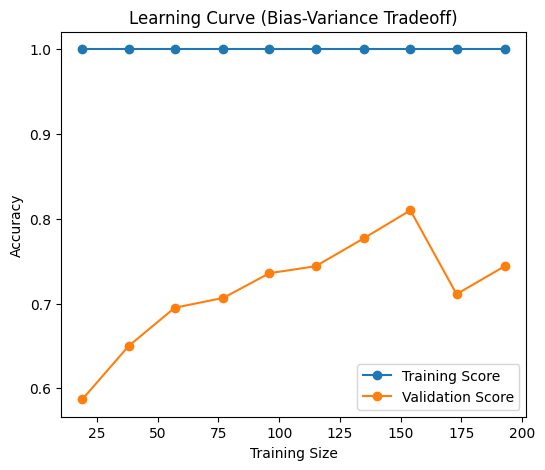

In [24]:
train_sizes, train_scores, test_scores = learning_curve(
    dec_tree, X_train, Y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)


train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Bias-Variance Tradeoff)")
plt.legend()
plt.show()


MODEL NUMBER 2 

In [25]:
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [26]:
df.shape

(303, 14)

In [27]:
X2 = df.drop('target' , axis=1)
Y2 = df['target']

In [28]:
print(X.shape)
print(Y.value_counts())

(303, 13)
target
1    165
0    138
Name: count, dtype: int64


In [29]:
x_train2 ,x_test2, y_train2 , y_test2 = train_test_split(X2,Y2 , test_size=0.2 , random_state=42, stratify=Y2)


In [30]:
dec_tree2 = DecisionTreeClassifier(criterion='entropy' , splitter='best', max_depth = 5,
random_state=42 ,min_samples_split = 2, min_samples_leaf = 1, max_features='log2')
dec_tree2.fit(x_train2 , y_train2)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
y_pred2 = dec_tree2.predict(x_test2)
y_pred2

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [32]:
print(f"Accuracy Score : {accuracy_score(y_test2 , y_pred2)}")

Accuracy Score : 0.7868852459016393


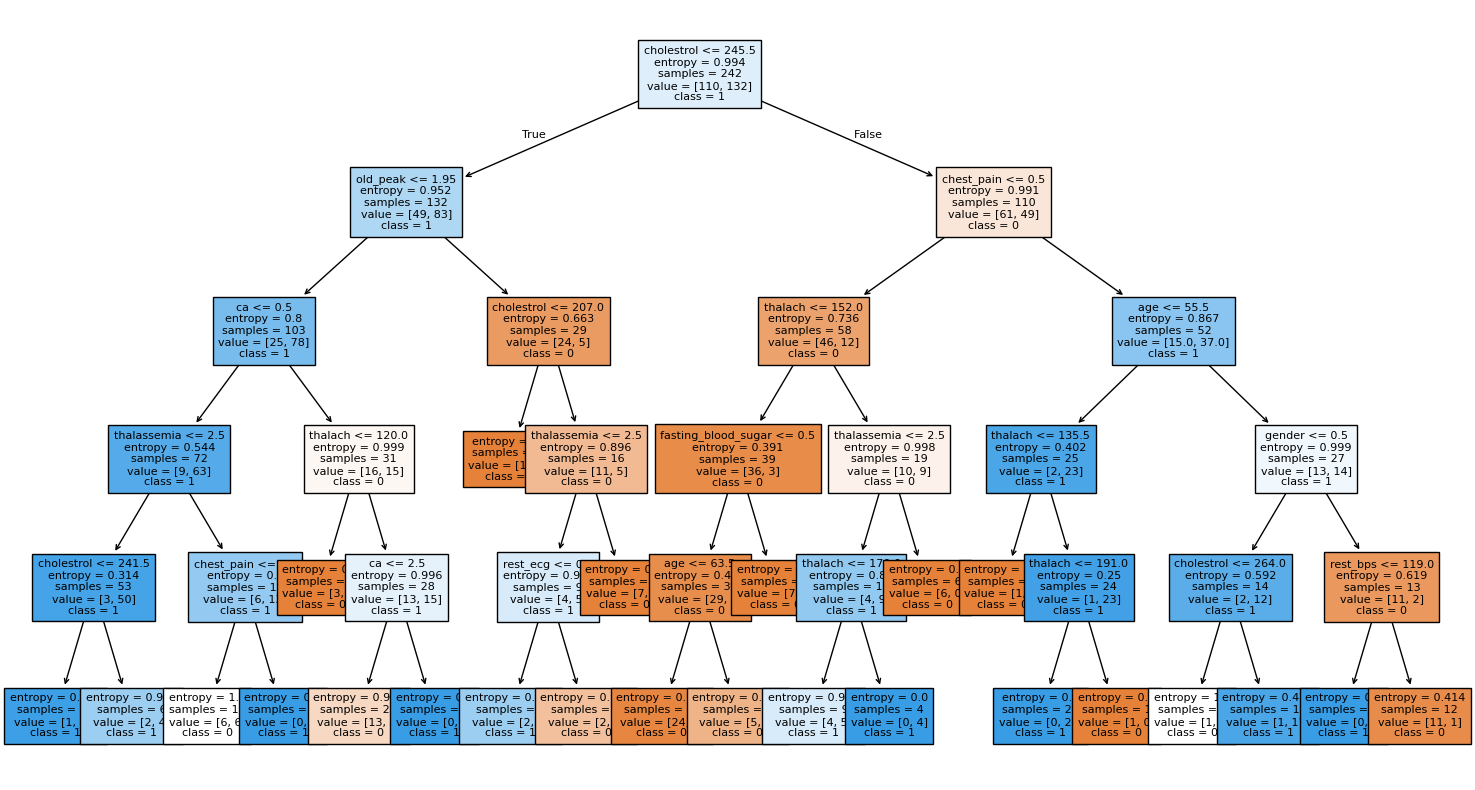

In [33]:
plt.figure(figsize=(15,8))
tree.plot_tree(
    dec_tree2,
    feature_names= X2.columns,
    class_names= [str(cls) for cls in set(Y2)],
    filled=True,
    fontsize=8,
    impurity=True,
    precision=3
)
plt.tight_layout()
plt.show()

In [34]:
cm2 = confusion_matrix(y_test2 , y_pred2)
cm2

array([[22,  6],
       [ 7, 26]])

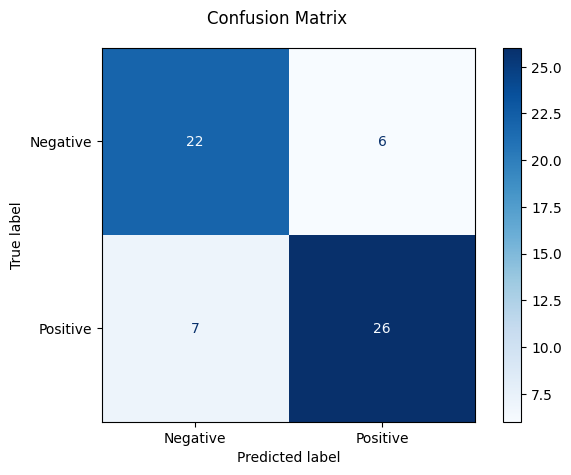

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2 , display_labels=['Negative' , 'Positive'] )
disp.plot(cmap = 'Blues')
plt.suptitle('Confusion Matrix ')
plt.tight_layout()
plt.show()

In [36]:
print(f"Accuarcy Score : {accuracy_score(y_test2 , y_pred2)}")
print(f"Recall Score : {recall_score(y_test2 , y_pred2)}")
print(f"Precision Score : {precision_score(y_test2 , y_pred2)} ")
print(f"F1 Score : {f1_score(y_test2 , y_pred2)}")

Accuarcy Score : 0.7868852459016393
Recall Score : 0.7878787878787878
Precision Score : 0.8125 
F1 Score : 0.8


In [37]:
Classification_Report = classification_report(y_test2 , y_pred2)
print(Classification_Report)

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.81      0.79      0.80        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [38]:
y_prob2 = dec_tree2.predict_proba(x_test2)[:,1]
fpr2 , tpr2 , thresholds2 = roc_curve(y_test2 , y_prob2 )
roc_auc2 = roc_auc_score(y_test2 , y_prob2)
print(f"Accuracy Score : {roc_auc2}")

Accuracy Score : 0.8452380952380952


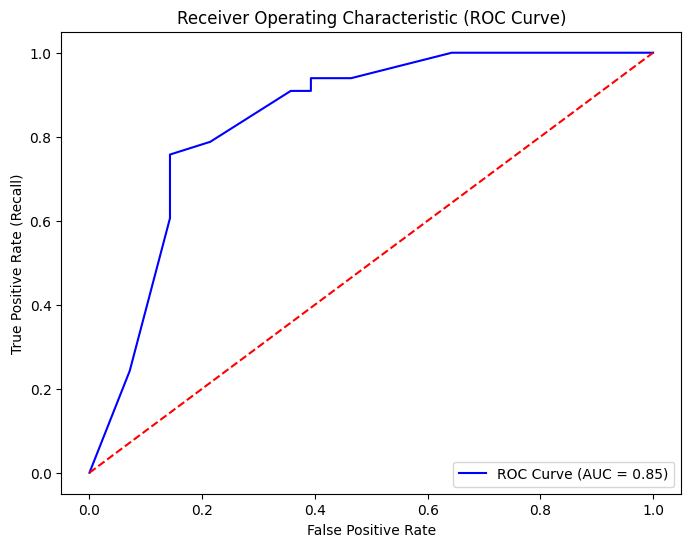

In [39]:
plt.figure(figsize=(8,6))
plt.plot(fpr2, tpr2, color="blue", label=f"ROC Curve (AUC = {roc_auc2:.2f})")
plt.plot([0,1], [0,1], color="red", linestyle="--")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.legend(loc="lower right")
plt.show()


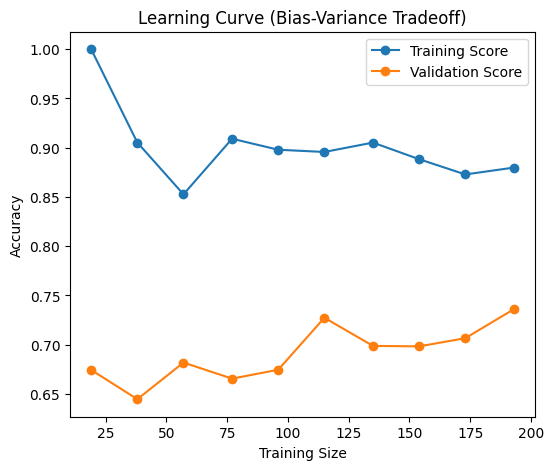

In [40]:
train_sizes2, train_scores2, test_scores2 = learning_curve(
    dec_tree2, x_train2, y_train2, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes =np.linspace(0.1, 1.0, 10)
)


train_mean2 = np.mean(train_scores2, axis=1)
test_mean2 = np.mean(test_scores2, axis=1)

plt.figure(figsize=(6, 5))
plt.plot(train_sizes2, train_mean2, 'o-', label="Training Score")
plt.plot(train_sizes2, test_mean2, 'o-', label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Bias-Variance Tradeoff)")
plt.legend()
plt.show()


MODEL 3 WITH GRID SEARCH CV


In [41]:
df3 = df.copy()

In [42]:
X3 = df3.drop('target',axis=1)
Y3 = df3['target']

In [43]:
X3

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [44]:
Y3.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [45]:
x_train3 , x_test3 , y_train3 , y_test3 = train_test_split(X3,Y3 , test_size=0.2 , random_state=42 , stratify=Y3)

In [46]:
dec_tree3 = DecisionTreeClassifier(random_state=42) 

In [47]:
param_grid_={
    'max_depth':[None,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_split':[2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'max_features':[None,'sqrt','log2'],
    'criterion':['gini','entropy']
}

In [48]:
GridSearch = GridSearchCV(estimator=dec_tree3 , param_grid= param_grid_ , cv=3 , scoring='accuracy' , n_jobs=-1)
GridSearch.fit(x_train3 , y_train3)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [49]:
y_pred3 = GridSearch.predict(x_test3)
y_pred3

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1])

In [50]:
print(f"Best Parameters : {GridSearch.best_params_}")

Best Parameters : {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 14}


In [51]:
print(f"Best Score : {GridSearch.best_score_}")

Best Score : 0.8100308641975308


In [52]:
best_model = GridSearch.best_estimator_
print(f"Best Model Accuracy : {best_model.score(x_test3 , y_test3)}")

Best Model Accuracy : 0.7868852459016393


In [53]:
print(f"Accuarcy Of the Grid Search Model : {accuracy_score(y_test3 , y_pred3)}")

Accuarcy Of the Grid Search Model : 0.7868852459016393


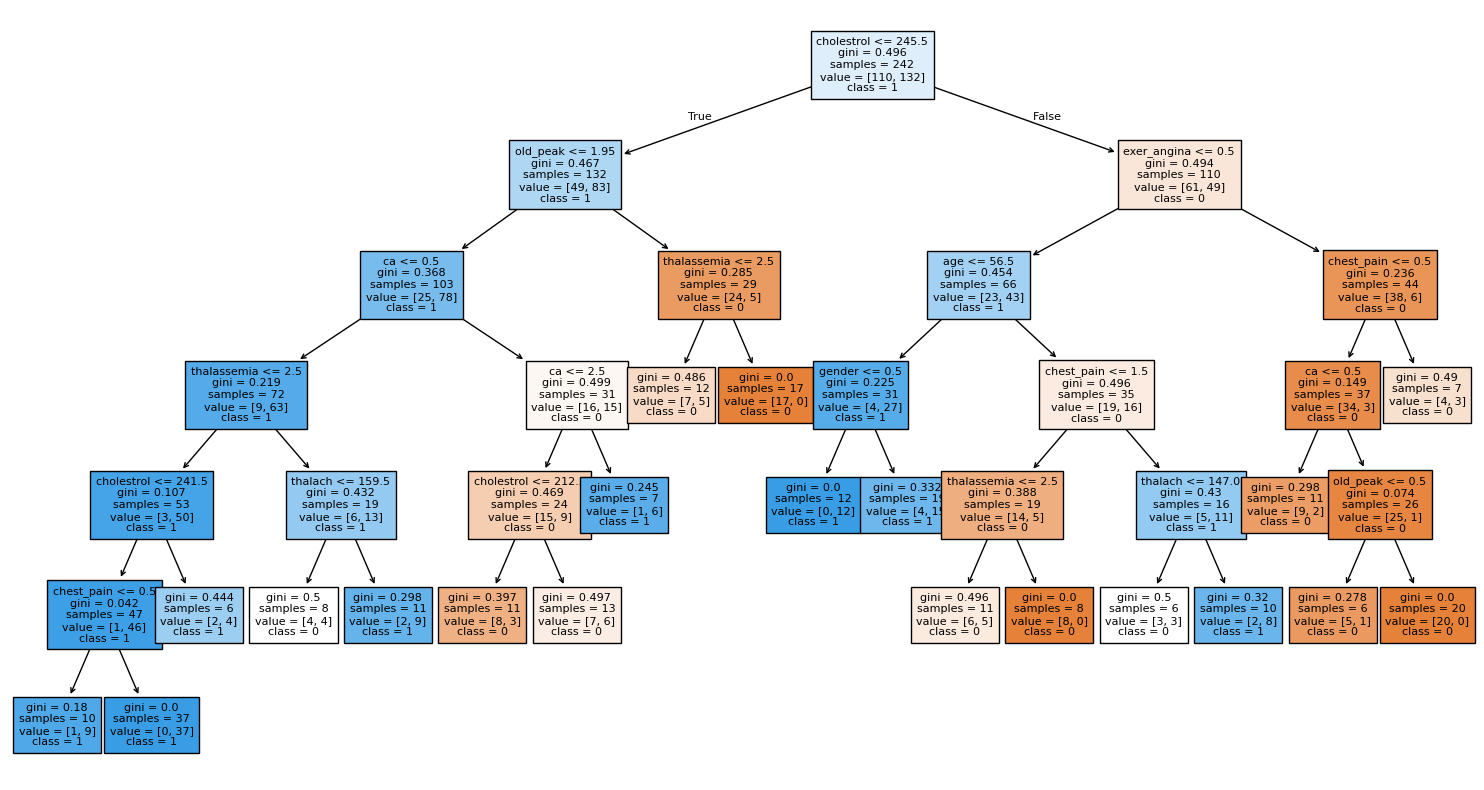

In [54]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,8))
plot_tree(
    best_model,
    feature_names=X3.columns.tolist(),
    class_names=[str(cls) for cls in set(Y3)],
    filled=True,
    fontsize=8,
    impurity=True,
    precision=3
)
plt.tight_layout()
plt.show()

In [55]:
cm3 = confusion_matrix(y_test3 , y_pred3)
cm3

array([[23,  5],
       [ 8, 25]])

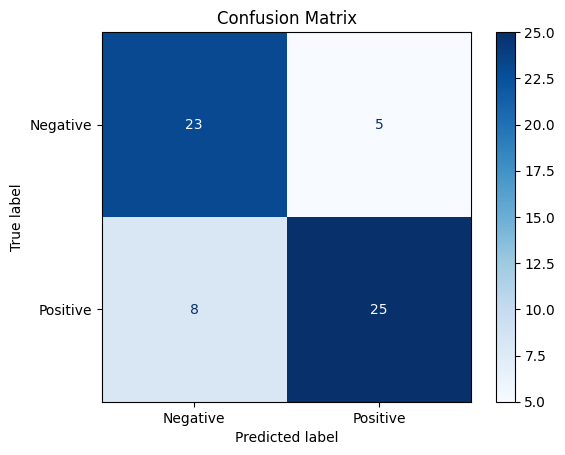

In [56]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm3 , display_labels=['Negative' , 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [57]:
Classification_Report3 = classification_report(y_test3 , y_pred3)
print(Classification_Report3)

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        28
           1       0.83      0.76      0.79        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [58]:
y_prob3 = best_model.predict_proba(x_test3)[:,1]
fpr3 , tpr3 , thresholds3 = roc_curve(y_test3 , y_prob3 )
roc_auc3 = roc_auc_score(y_test3 , y_prob3)
print(f"Accuracy Score : {roc_auc3}")

Accuracy Score : 0.8468614718614718


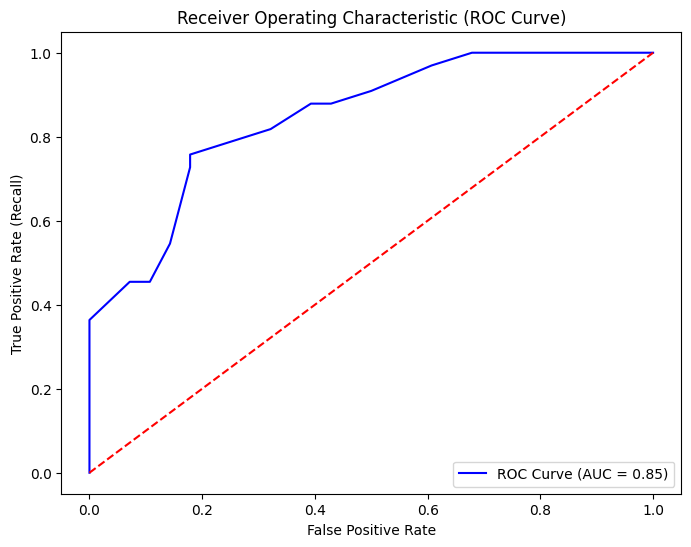

In [59]:
plt.figure(figsize=(8,6))
plt.plot(fpr3, tpr3, color="blue", label=f"ROC Curve (AUC = {roc_auc3:.2f})")
plt.plot([0,1], [0,1], color="red", linestyle="--")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.legend(loc="lower right")
plt.show()


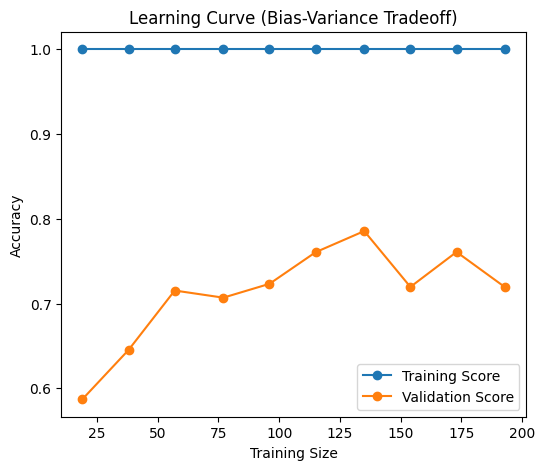

In [60]:
train_sizes3, train_scores3, test_scores3 = learning_curve(
    dec_tree3, x_train3, y_train3, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes = np.linspace(0.1, 1.0, 10)
)


train_mean3 = np.mean(train_scores3, axis=1)
test_mean3 = np.mean(test_scores3, axis=1)

plt.figure(figsize=(6, 5))
plt.plot(train_sizes3, train_mean3, 'o-', label="Training Score")
plt.plot(train_sizes3, test_mean3, 'o-', label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Bias-Variance Tradeoff)")
plt.legend()
plt.show()